In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score

import warnings

In [4]:
warnings.filterwarnings('ignore')
df = pd.read_csv("Life Expectancy Data.csv")
df= df.rename(columns=lambda x: x.strip())

## Prediksi Angka Harapan Hidup Dengan Metode Linear Regresi
### 1. Preview Data

### 2. Data Pre-Processing

### 3. Exploratory data analysis (EDA)

### 4. Modelling

### 5. Result

==============================================================================================================================================

# Preview Data

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df.shape

(2938, 22)


|    Nama Kolom          |                     Deskripsi                           | 
| ---                    | ---                                                     | 
| Status                 | Status negara berkembang/developing atau maju/developed | 
| Life Expectancy        | Angka Harapan Hidup (berdasarkan Umur)                  | 
| Adult Mortality        | Tingkat kematian orang dewasa dari kedua jenis kelamin (Laki - laki & Perempuan), kemungkinan kematian antara umur 15 - 60 tahun per 1000 penduduk                    |          
| Infant Deaths          | Jumlah kematian pada bayi per 1000 penduduk             |                                           
| Alcohol                | Konsumsi alkohol, per kepala (orang) dengan usia 15+ (konsumsi dalam liter alkohol murni)                   |                                    
| Percentage Expenditure | Besar pengaruh pengeluaran kesehatan dalam PDB (Produk Domestik Bruto) untuk tiap orang dalam persentase (%)  |  
| Hepatitis B            | Cakupan imunisasi hepatitis B (HepB) di antara anak berusia 1 tahun                                       |                
| Measles                | Jumlah kasus yang dilaporkan per 1000 penduduk          |
| BMI                    | Rata - rata berat badan dari seluruh penduduk           |
| Under-Five Deaths      | Angka kematian dengan umur dibawah 5 tahun (anak - anak dan bayi) per 1000 penduduk                            | 
| Polio                  | Cakupan imunisasi polio (Pol3) di antara anak berusia 1 tahun                                                |
| Total Expenditure      | Pengeluaran umum pemerintah untuk kesehatan sebagai persentase dari total pengeluaran pemerintah           |
| Diphtheria             | Cakupan imunisasi difteri tetanus toksoid dan pertusis (DTP3) di antara anak berusia 1 tahun                  |
| HIV/AIDS               | Kematian per 1000 kelahiran karena HIV/AIDS             |
| GDP                    | Produk Domestik Bruto per kapita dalam dollar US        |
| Population             | Populasi dari sebuah negara                             |
| Thinnes 1-19 years     | Prevalensi kekurangan gizi di kalangan anak-anak dan remaja untuk Usia 10 hingga 19 tahun                   |
| Thinnes 5-9 years      | Prevalensi kekurangan gizi di kalangan anak-anak untuk Usia 10 hingga 19 tahun                                |
| Income Composition     | Human Development Index dalam hal komposisi pendapatan sumber daya (indeks mulai dari 0 hingga 1               |
| Schooling              | Jumlah tahun bersekolah                                 |

# Data Pre-Processing

## Handling Missing Data

In [9]:
df.isna().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness  1-19 years                34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
HIV/AIDS                             0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

In [10]:
df=df.fillna(df.median())
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

## Encoding Categorical Variable

In [11]:
enc = LabelEncoder()
df['Status'] = enc.fit_transform(df['Status'])
df['Country'] = enc.fit_transform(df['Country'])
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Handling Duplicated Data

In [12]:
df.duplicated().sum()

0

## Eliminasi Redundant Feature

<AxesSubplot:>

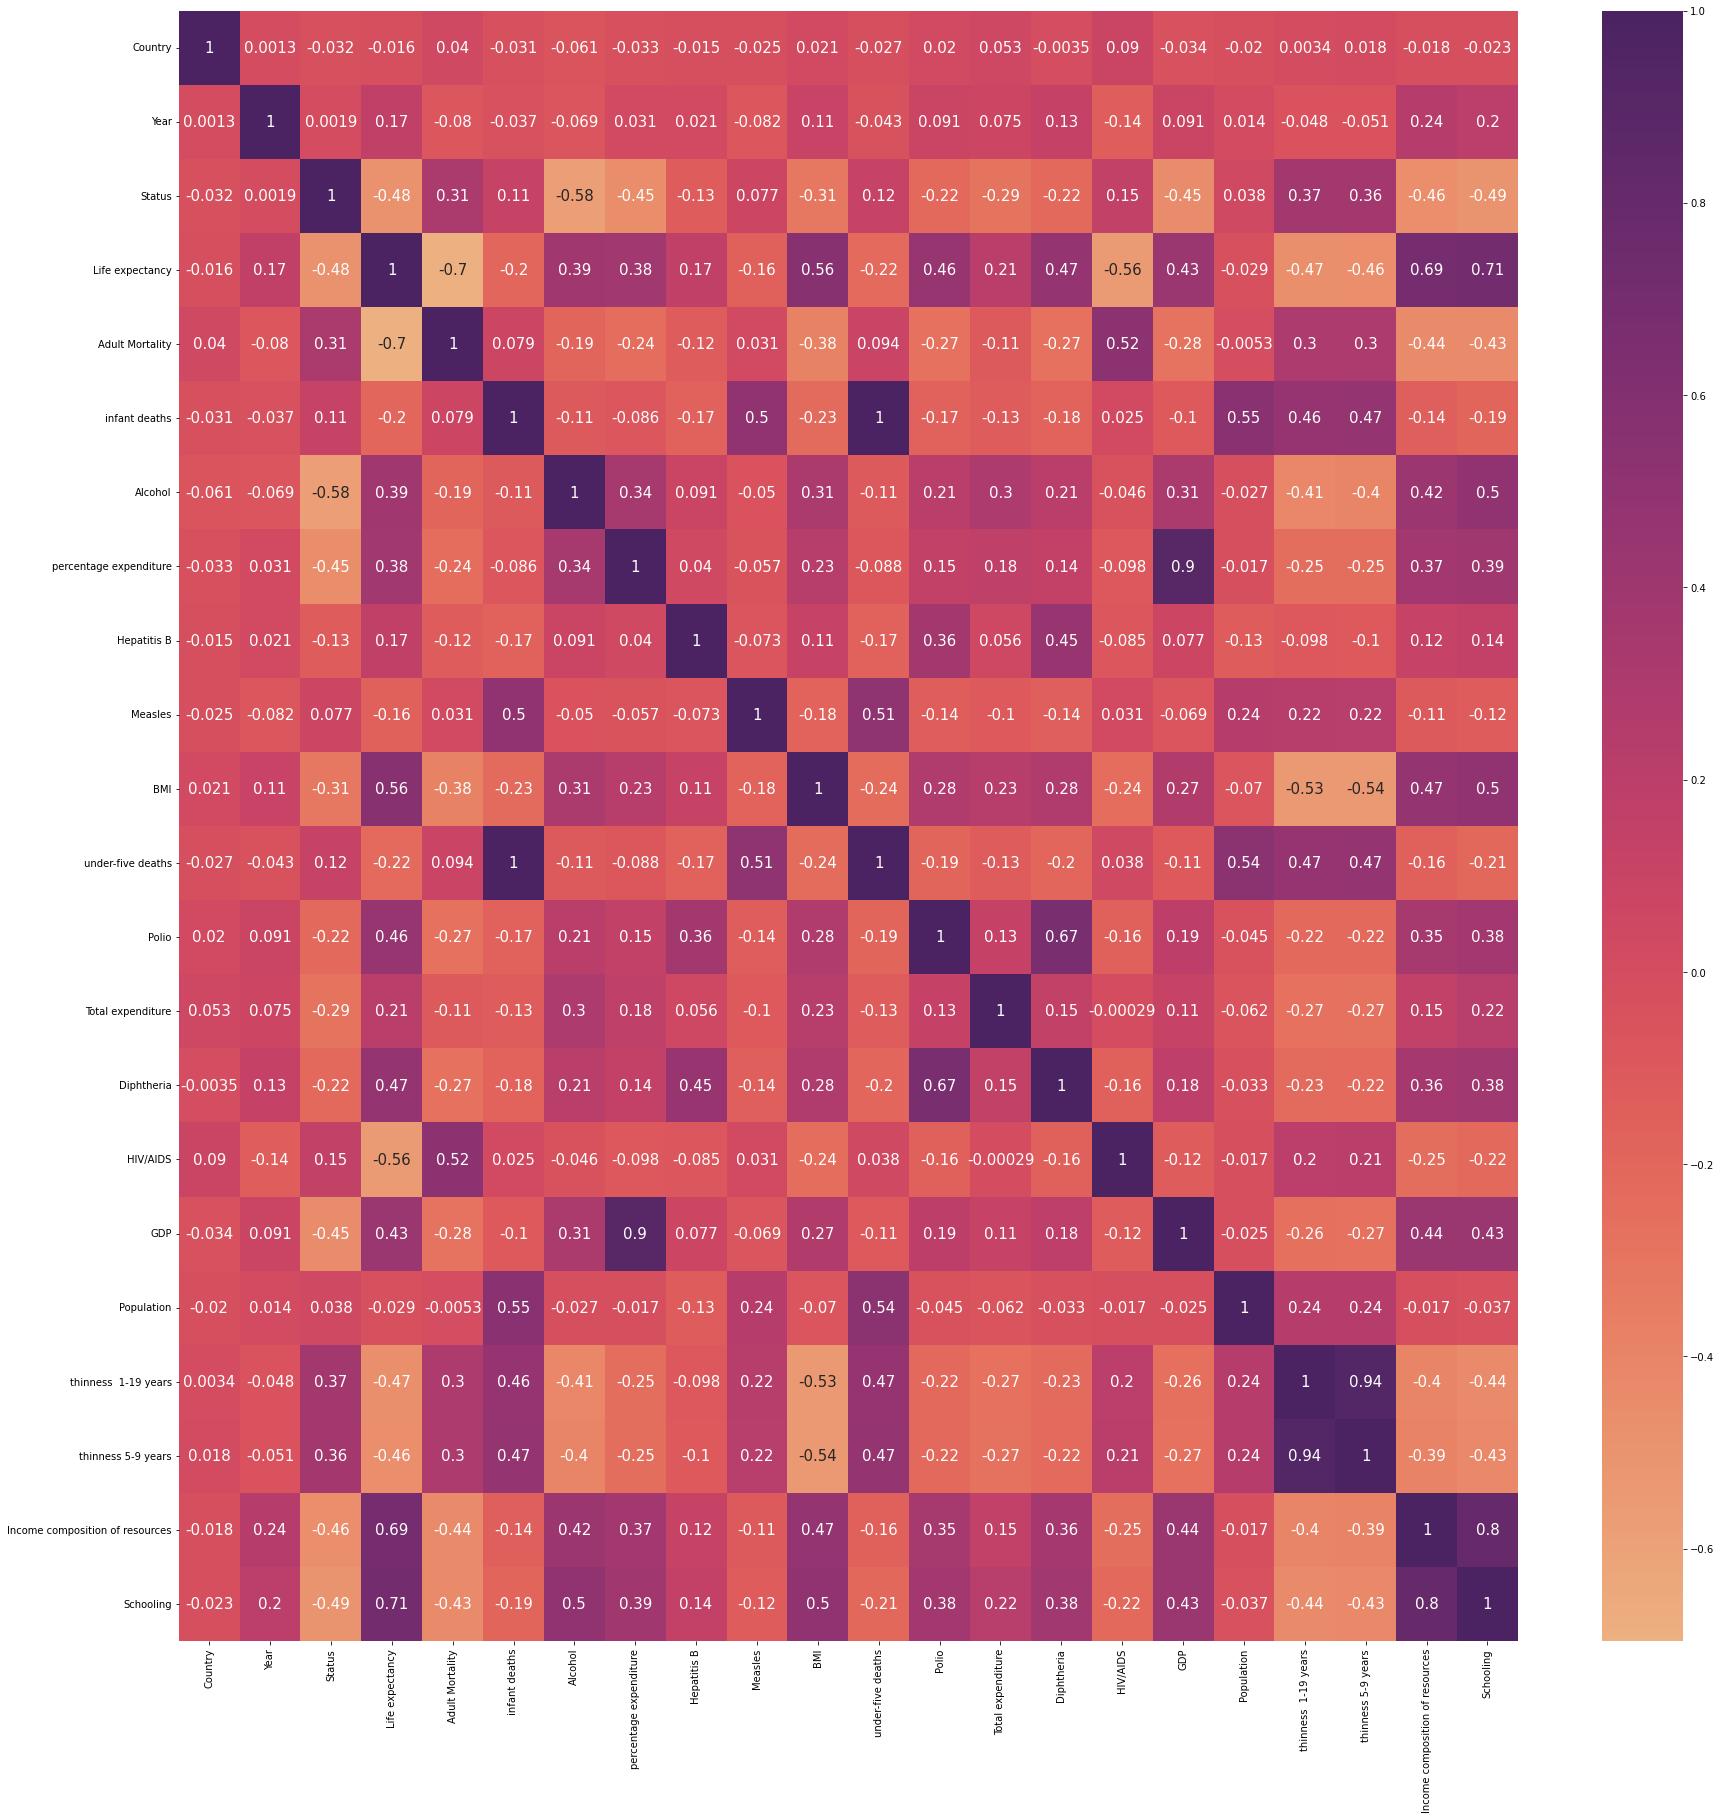

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True, cmap='flare', annot_kws={'size':15},square=False)

In [14]:
df = df.drop(['thinness  1-19 years','percentage expenditure'],axis=1)

## Subset Feature dan Target Variable 

In [15]:
Feature = df.drop(['Life expectancy','Country','Year'],axis=1)
Target = df['Life expectancy']

## Scale Data

In [16]:
ss = StandardScaler()
Feature_Slace = ss.fit_transform(Feature)

## Split Data (Training & Test)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Feature_Slace, Target, test_size = 0.3, random_state=42)


# Exploratory data analysis

## Perbandingan Negara **Developed** dan **Developing**

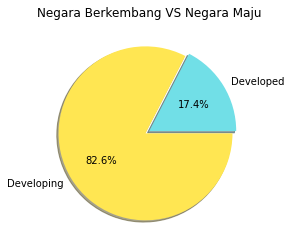

In [18]:
dfVisualized = pd.read_csv("Life Expectancy Data.csv")
dfStatus = dfVisualized.groupby(['Status']).count()

plt.pie(dfStatus["Country"],labels=["Developed","Developing"],colors = ["#71DFE7","#FFE652"],shadow=True,autopct = '%1.1f%%',explode=[0,0.05])
plt.title("Negara Berkembang VS Negara Maju")
plt.show()

Hasil Observasi
- Negara berkembang memiliki jumlah lebih banyak dibandingkan negara maju

## Perbandingan Feature dan Target Variabel

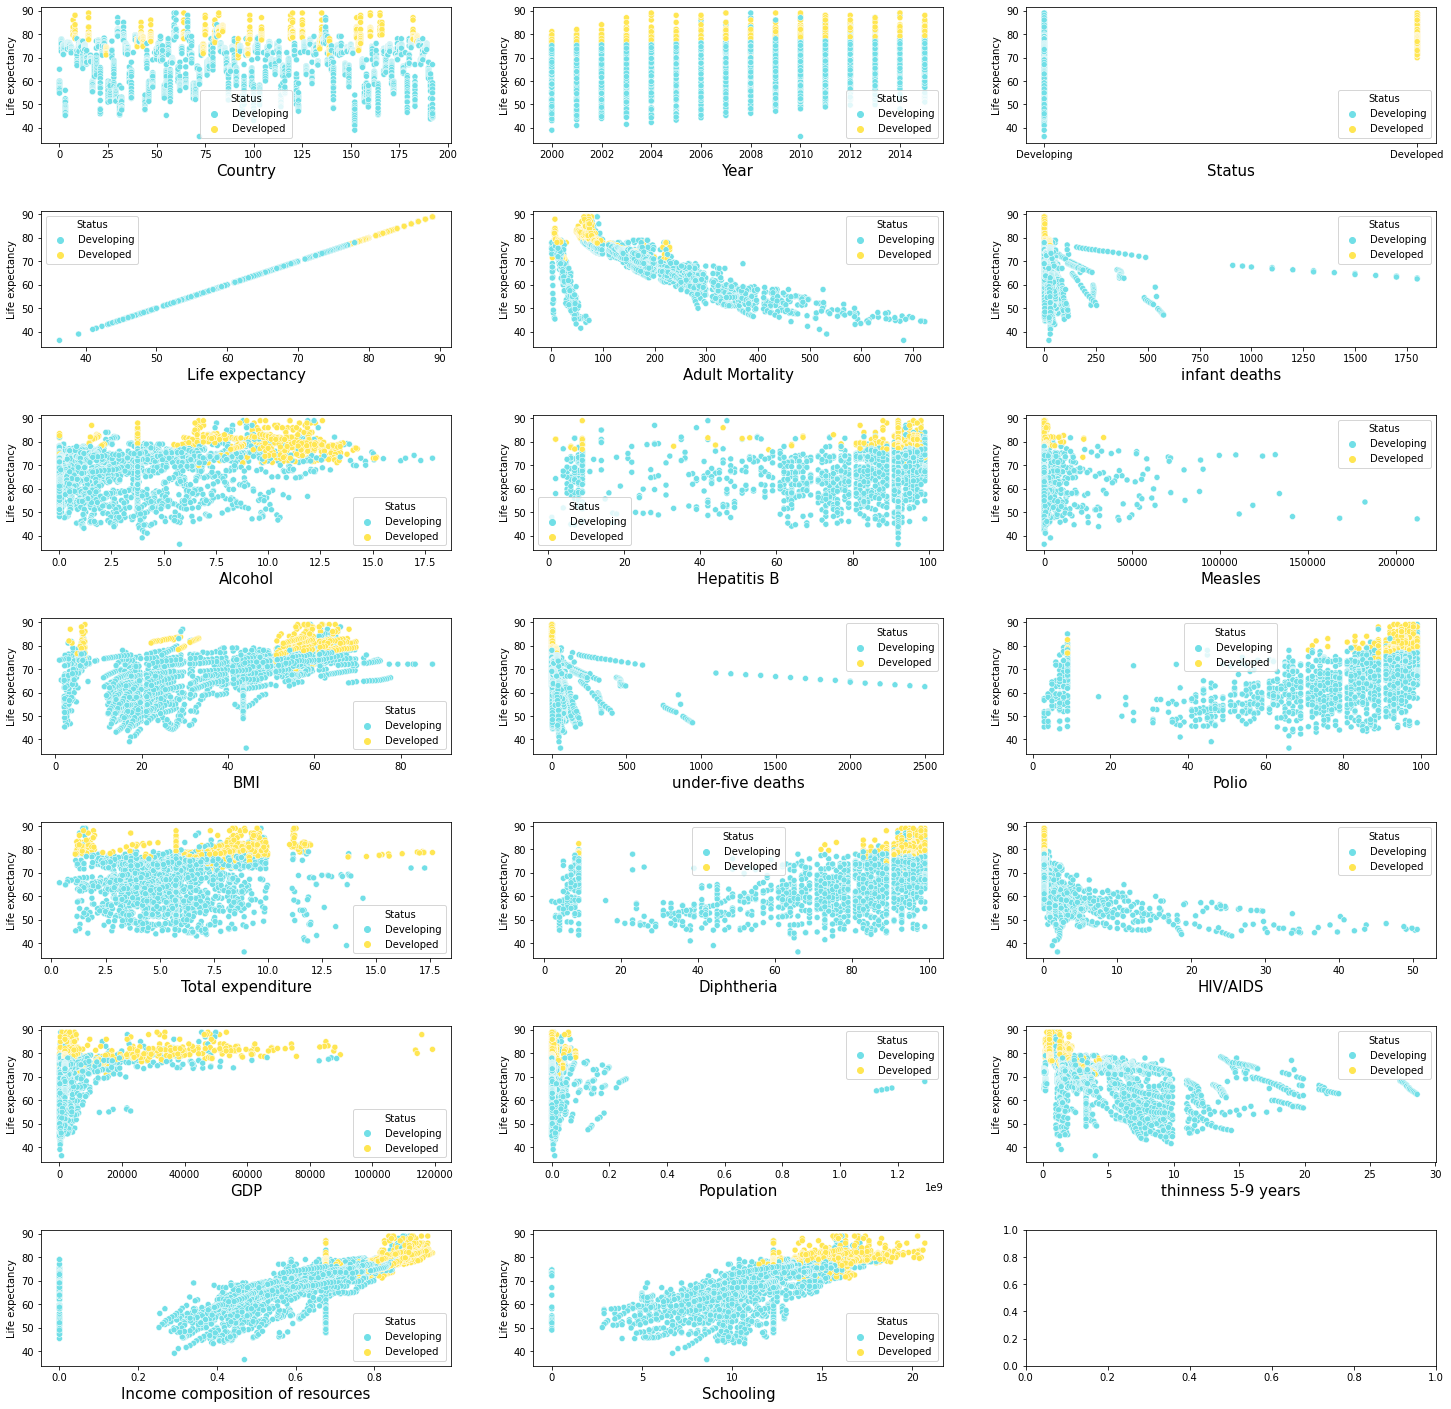

In [19]:
df["Status"] = dfVisualized["Status"]

fig, axs = plt.subplots(7,3, figsize=(25,25))
plt.subplots_adjust(hspace=0.5)
for c, feature in enumerate(df.columns):
    a = sns.scatterplot(x=feature, y='Life expectancy', data=df, ax = axs.flat[c], hue='Status',palette=["#71DFE7","#FFE652"])
    a.set_xlabel(feature,fontsize=15)

Hasil Observasi

- Angka Harapan Hidup
Jika kita perhatikan dengan baik pada semua perbandingan antara feature dan target variabel,
kita bisa menyimpulkan bahwa mereka semua memiliki 1 kesamaan yang sama yaitu, "Semua negara
maju angka harapan hidupnya (umur) pasti diatas 65 tahun, tetapi tidak semua negara dengan
angka harapan hidup diatas 65 tahun adalah negara maju."

- Jumlah kematian pada bayi dan anak dibawah 5 tahun
Pada kedua perbandingan ini, negara dengan status "developed atau negara maju", terlihat
sangat sedikit, mengapa bisa begitu, apakah ada yang salah dengan visualisasi datanya? Tidak
ada yang salah sama sekali dengan visualisasi tersebut. Itu dikarenakan angka kematian 
pada bayi dan anak dibawah 5 tahun untuk negara maju hampir tidak ada, oleh karena itu
mereka membuat cluster pada range 0 - 100 untuk kedua feature ini. Saat visualisasi dengan
scatter plot yang mengandung ribuan data seperti ini dan terjadi clustering akan menjadi
lumayan susah untuk melakukan analisis pada data tersebut. Karena clustering tersebut,
akan terjadi penumpukan visualisasi yang mana mengakibatkan entitas negara lainnya bisa tidak
terlihat.

- Imunisasi Hepatitis B, Polio, Diphtheria
Saat kita perhatikan lagi dengan baik untuk ketiga feature ini mempunyai banyak kesamaan 
pada angka imunisasinya. Ini terbukti karena saat divisualisasikan, tidak banyak perbedaan 
yang terlihat untuk ketiga feature ini. Saat diperhatikan, ternyata baik negara berkembang
maupun maju memiliki persentasi imunisasi yang bisa dibilang cukup tinggi yaitu diantara
60 - 100 %, perlu diingat imunisasi ialah proses vaksinasi kepada anak dengan kisaran umur
1 tahun.

## Korelasi Feature dan Target Variabel

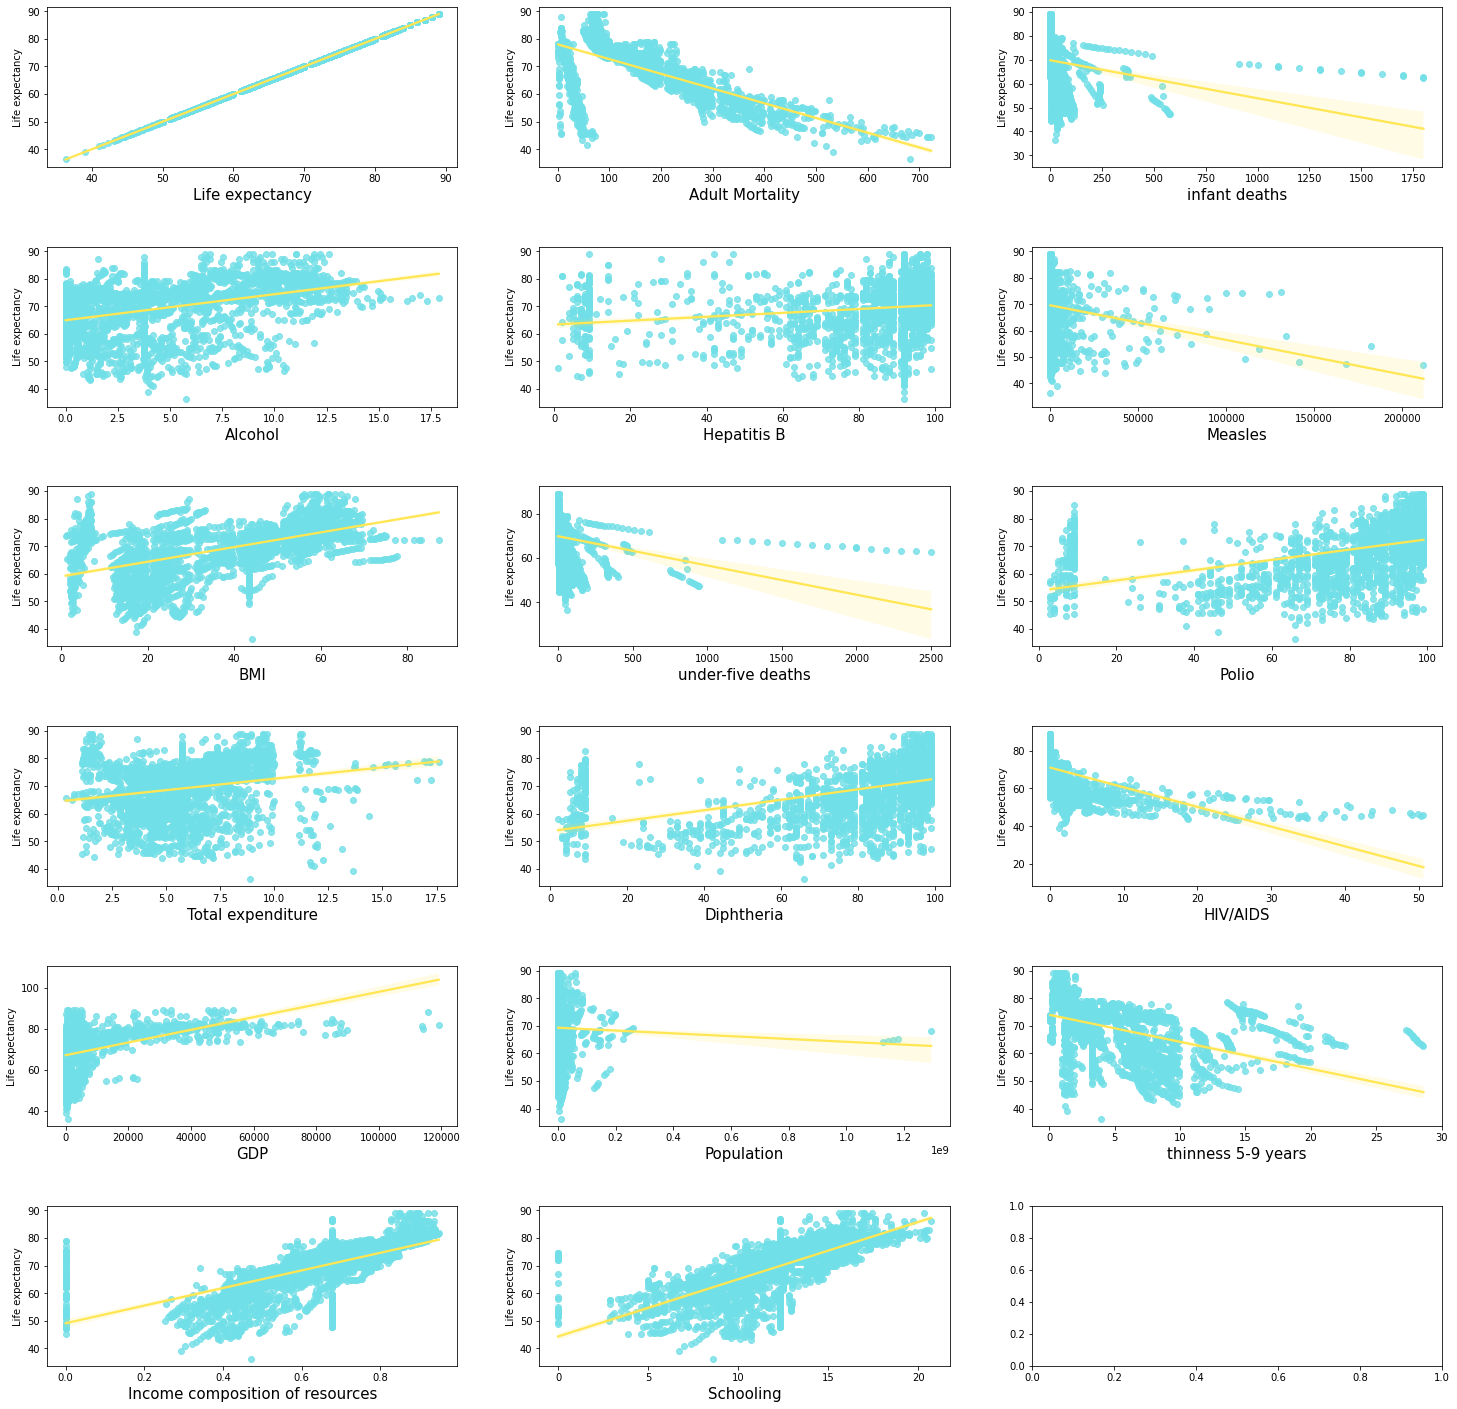

In [20]:
dfRegplot = df.drop(['Status','Country','Year'],axis=1)
fig, axs = plt.subplots(6,3, figsize=(25,25))
plt.subplots_adjust(hspace=0.5)
for c, feature in enumerate(dfRegplot.columns):
    a = sns.regplot(x=feature, y='Life expectancy', data=dfRegplot, ax = axs.flat[c],scatter_kws={"color": "#71DFE7"},line_kws={"color": "#FFE652"})
    a.set_xlabel(feature,fontsize=15)
    

Hasil Observasi
- Target hampir berhubungan linear dengan : Schooling, Income composition of resources, GDP, BMI
- Target memiliki hubungan korelasi negatif dengan : HIV/AIDS, Thinnes 5-9 years, Under five-deaths, Infant Deaths, Adult Mortality 

Text(0.5, 1.0, 'Feature Correlation dengan Target Variabel')

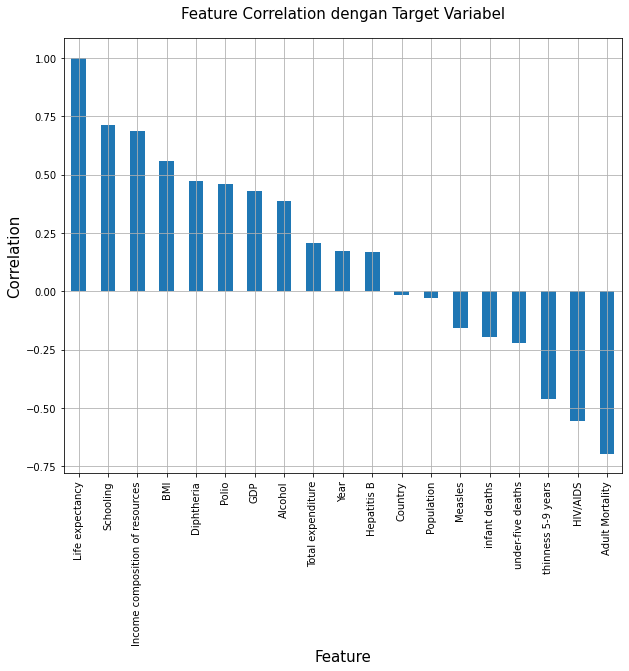

In [21]:
Cor = df.corr()["Life expectancy"].sort_values(ascending=False)

fig, axs = plt.subplots(figsize=(10,8))
plt.style.use("default")
Cor.plot.bar()
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Correlation",fontsize=15)
plt.grid()
plt.title("Feature Correlation dengan Target Variabel",fontsize=15,pad=20)



# Modelling

## Linear Regression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
print(f"Intercept Model: {model.intercept_}")
Coef_Dict = {"Features":Feature.columns,"Koefisien":model.coef_}
Coef = pd.DataFrame(Coef_Dict,columns=["Features","Koefisien"])
Coef

Intercept Model: 69.30742128818173


,Features,Koefisien
0,Status,-0.608898
1,Adult Mortality,-2.456148
2,infant deaths,11.763923
3,Alcohol,0.251725
4,Hepatitis B,-0.410132
5,Measles,-0.299509
6,BMI,0.844616
7,under-five deaths,-11.864176
8,Polio,0.537704
9,Total expenditure,0.078681


In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}" )
print(f"MSE: {mean_squared_error(y_test,y_pred)}")

RMSE: 4.086297302111877
MSE: 16.697825641246805


In [25]:
cv_scores = cross_val_score(model,X_train,y_train,cv=5)
print("Nilai akurasi training set: {} %".format(np.mean(cv_scores)*100))
cv_scores = cross_val_score(model,X_test,y_test,cv=5)
print("Nilai akurasi testing set : {} %".format(np.mean(cv_scores)*100))

Nilai akurasi training set: 81.15921717419496 %
Nilai akurasi testing set : 81.35859050825769 %


[Text(0.5, 0, 'Aktual'),
 Text(0, 0.5, 'Prediksi'),
 Text(0.5, 1.0, 'Perbandingan Nilai Aktual dan Prediksi')]

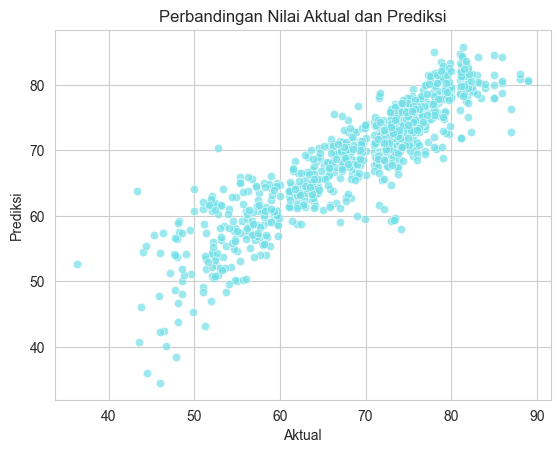

In [26]:
sns.set_style("whitegrid")
sns.scatterplot(y_test,y_pred,color="#71DFE7",alpha=0.7).set(xlabel="Aktual",ylabel="Prediksi",title="Perbandingan Nilai Aktual dan Prediksi")

In [27]:
Predicted = pd.DataFrame({'Aktual': y_test, 'Prediksi': np.around(y_pred,2)})
Predicted["Prediction Error"] = np.around(np.abs(Predicted["Aktual"] - Predicted["Prediksi"]),2)
Predicted

,Aktual,Prediksi,Prediction Error
2546,73.7,67.30,6.40
650,75.9,77.21,1.31
1740,74.2,75.50,1.30
177,76.8,78.24,1.44
1377,51.9,47.08,4.82
...,...,...,...
1241,69.3,68.74,0.56
1456,69.9,73.93,4.03
123,86.0,80.64,5.36
2509,81.7,83.59,1.89


[Text(0.5, 1.0, 'Jumlah Prediction Error')]

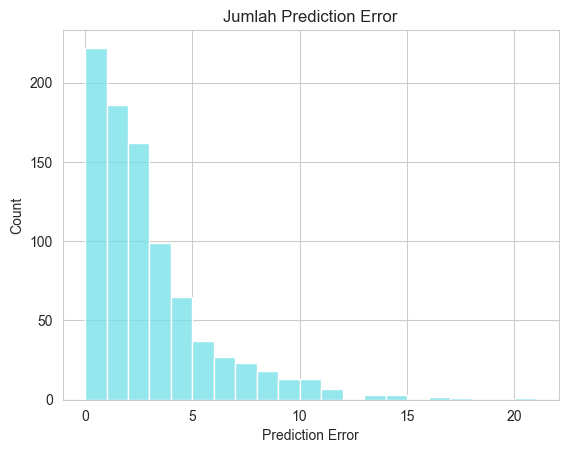

In [28]:
sns.set_style("whitegrid")
sns.histplot(x="Prediction Error",data=Predicted,binwidth=1,stat="count",color="#71DFE7").set(title="Jumlah Prediction Error")

##  K-Nearest Neighbours

### Menentukan nilai K

In [29]:
Param_grid = {'n_neighbors' : np.arange(1,50)}
KNNmodel = KNeighborsRegressor()
knn_cv = GridSearchCV(KNNmodel,Param_grid,cv =5)
knn_cv.fit(Feature_Slace,Target)
knn_cv.best_params_

{'n_neighbors': 31}

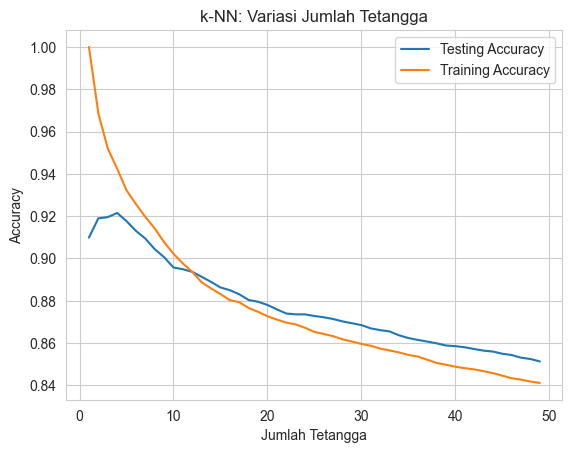

In [30]:
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Variasi Jumlah Tetangga')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Jumlah Tetangga')
plt.ylabel('Accuracy')
plt.show()

### Modelling KNN Regressor

In [31]:
KNNmodel = KNeighborsRegressor(n_neighbors=31)
cv_scores = cross_val_score(KNNmodel,X_train,y_train,cv=5)
print("Nilai akurasi training set: {} %".format(np.mean(cv_scores)*100))
cv_scores = cross_val_score(KNNmodel,X_test,y_test,cv=5)
print("Nilai akurasi testing set : {} %".format(np.mean(cv_scores)*100))

Nilai akurasi training set: 83.7605918138987 %
Nilai akurasi testing set : 82.68038462749375 %


In [32]:
KNNmodel.fit(X_train, y_train)
y_predKNN = KNNmodel.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

4.086297302111877

[Text(0.5, 0, 'Aktual'),
 Text(0, 0.5, 'Prediksi'),
 Text(0.5, 1.0, 'Perbandingan Nilai Aktual dan Prediksi')]

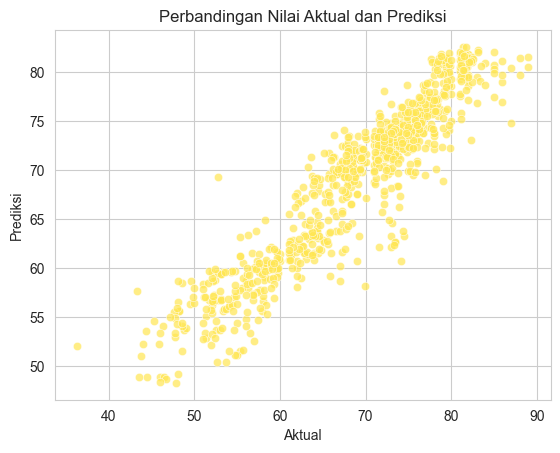

In [33]:
sns.set_style("whitegrid")
sns.scatterplot(y_test,y_predKNN,color="#FFE652",alpha=0.7).set(xlabel="Aktual",ylabel="Prediksi",title="Perbandingan Nilai Aktual dan Prediksi")

In [34]:
PredictedKNN = pd.DataFrame({'Aktual': y_test, 'Prediksi': np.around(y_predKNN,2)})
PredictedKNN["Prediction Error"] = np.around(np.abs(PredictedKNN["Aktual"] - PredictedKNN["Prediksi"]),2)
PredictedKNN

,Aktual,Prediksi,Prediction Error
2546,73.7,68.35,5.35
650,75.9,75.45,0.45
1740,74.2,72.21,1.99
177,76.8,75.45,1.35
1377,51.9,52.11,0.21
...,...,...,...
1241,69.3,70.09,0.79
1456,69.9,73.87,3.97
123,86.0,79.70,6.30
2509,81.7,82.53,0.83


[Text(0.5, 1.0, 'Jumlah Prediction Error')]

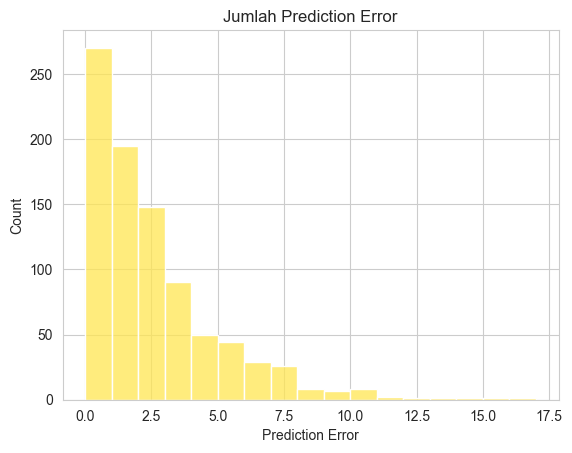

In [35]:
sns.set_style("whitegrid")
sns.histplot(x="Prediction Error",data=PredictedKNN,binwidth=1,stat="count",color="#FFE652").set(title="Jumlah Prediction Error")

# Result

Prediksi angka harapan hidup dari suatu negara dengan kriteria berikut:
- Status =                              Developing
- infant deaths   =                           154
- Alcohol    =                               0.01
- Hepatitis B    =                           95.0
- Measles     =                              2924
- BMI      =                                 13.5
- under-five deaths  =                        201
- Polio             =                        96.0
- Total expenditure   =                       2.8
- Diphtheria    =                            94.0
- HIV/AIDS     =                              0.1
- GDP       =                          541.651484
- Population      =                   147139191.0
- thinness 5-9 years        =                 2.1
- Income composition of resources  =        0.513
- Schooling       =                           8.6

## Metode Regresi Linear

In [36]:
Predict = [1,151,154,0.01,95,2924,13.5,201,96,2.8,94,0.1,541.6514,147139191,2.1,0.513,8.6]
Predict = np.array(Predict).reshape(1,-1)
Predict = ss.fit_transform(Predict)
Result = model.predict(Predict)
print(Result)

[69.30742129]


Maka angka harapan hidup dari negara dengan kriteria tersebut adalah sekitar `69.30`

## Metode KNN Regresor

In [37]:
Predict = [1,151,154,0.01,95,2924,13.5,201,96,2.8,94,0.1,541.6514,147139191,2.1,0.513,8.6]
Predict = np.array(Predict).reshape(1,-1)
Predict = ss.fit_transform(Predict)
Result = KNNmodel.predict(Predict)
Result

array([71.22580645])

Maka angka harapan hidup dari negara dengan kriteria tersebut adalah sekitar `71.22580645`